In [59]:
# Libraries

import os, shutil, keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob

from PIL import Image

from keras import layers
from keras import models

from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from numpy import genfromtxt

In [23]:
# Model with only feature extractor layers
ft_extract = models.Sequential()
ft_extract.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
ft_extract.add(layers.MaxPooling2D((2, 2)))
ft_extract.add(Conv2D(64, (3, 3), activation='relu'))
ft_extract.add(MaxPooling2D((2, 2)))
ft_extract.add(Conv2D(128, (3, 3), activation='relu'))

# Add other new layers to help with prediction
x = ft_extract.output
x =MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(3, activation = 'relu')(x)

prediction_layer=Dense(3, activation = 'softmax')(x)

# Compile new feature extractor model
model2=models.Model(inputs=ft_extract.input, outputs=prediction_layer)
model2.compile(loss='categorical_crossentropy', 
    optimizer =keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False),
    metrics=['acc'])

model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0   

In [ ]:
'''
# renaming files
#skip
import os
path = '/Users/Nadia/Desktop/FinalProject490/validation/validation_scissors copy'
files = os.listdir(path)

for index, file in enumerate(files):
    num=index+287
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(num), '.png'])))
    '''

In [34]:
#get training data and labels
train_data = []
files = glob.glob ("/Users/Nadia/Desktop/FinalProject490/train_x/*.png")
for myFile in files:
    image = cv2.imread(myFile)  
    image = np.asarray(image)
    train_data.append (cv2.resize(image, dsize=(150, 150), interpolation=cv2.INTER_CUBIC))

#prints batch size, height, width, depth
print('X_data shape:', np.array(train_data).shape)

train_lab = np.loadtxt('/Users/Nadia/Desktop/FinalProject490/train_y.csv', delimiter=',', usecols=(0), unpack=True, dtype=str)

print('lab shape:', np.array(train_lab).shape)

X_data shape: (1531, 150, 150, 3)
lab shape: (1531,)


In [35]:
print(train_lab)

['rock' 'rock' 'rock' ... 'scissors' 'scissors' 'scissors']


In [36]:
#get validation data and labels
valid_data = []
files = glob.glob ("/Users/Nadia/Desktop/FinalProject490/valid_x/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    image = np.asarray(image)
    valid_data.append (cv2.resize(image, dsize=(150, 150), interpolation=cv2.INTER_CUBIC))

#prints batch size, height, width, depth
print('valid_data shape:', np.array(valid_data).shape)

valid_lab = np.loadtxt('/Users/Nadia/Desktop/FinalProject490/valid_y.csv', delimiter=',', usecols=(0), unpack=True, dtype=str)

print('lab shape:', np.array(valid_lab).shape)

valid_data shape: (437, 150, 150, 3)
lab shape: (437,)


In [37]:
#get testing data and labels
test_data = []
files = glob.glob ("/Users/Nadia/Desktop/FinalProject490/test1/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    image = np.asarray(image)
    test_data.append (cv2.resize(image, dsize=(150, 150), interpolation=cv2.INTER_CUBIC))

#prints batch size, height, width, depth
print('test_data shape:', np.array(test_data).shape)

#train_labels = genfromtxt('/Users/Nadia/Desktop/FinalProject490/train_y.csv', delimiter=',')   
test_lab = np.loadtxt('/Users/Nadia/Desktop/FinalProject490/test_y.csv', delimiter=',', usecols=(0), unpack=True, dtype=str)

print('lab shape:', np.array(test_lab).shape)

test_data shape: (181, 150, 150, 3)
lab shape: (181,)


In [45]:
model_feat = Model(inputs=model2.input,outputs=model2.get_layer('dense_2').output)

In [65]:
feat_train = model_feat.predict(np.array(train_data))
feat_test = model_feat.predict(np.array(test_data))

In [ ]:
arr = np.array([])

for row in train_image_list:
    arr = np.append(arr, row)

print(arr)

In [72]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion="entropy", random_state = 100)

dtree_trained = dtree.fit(feat_train,train_lab)

acc = dtree.score(feat_train, train_lab)
print(acc)

0.8288700195950359


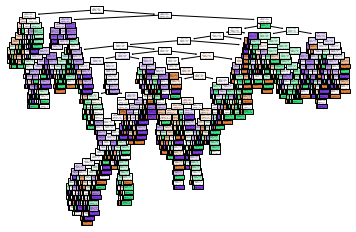

In [69]:
import matplotlib.pyplot as plt

plt.figure()
plot_tree(dtree, filled=True)
plt.show()